## LSTM example with cosine signal ##

In [4]:
import numpy as np 
# from standard_plots import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

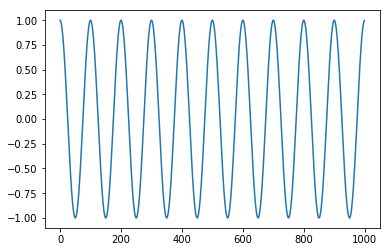

In [11]:
dataset=np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plt.plot(dataset)

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [31]:
look_back=20
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
#split into train and test datasets
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train, test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print('train shape',train.shape)
print('trainX shape',trainX.shape)
print('trainY shape',trainY.shape)

train shape (670, 1)
trainX shape (650, 20, 1)
trainY shape (650,)


In [32]:
%%time
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(32,input_dim=1))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=batch_size, verbose=2)

/home/malla/anaconda2/envs/tensorflow35/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/home/malla/anaconda2/envs/tensorflow35/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 1))`
  after removing the cwd from sys.path.
/home/malla/anaconda2/envs/tensorflow35/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
5s - loss: 0.0396
Epoch 2/100
5s - loss: 0.0081
Epoch 3/100
5s - loss: 0.0063
Epoch 4/100
5s - loss: 0.0044
Epoch 5/100
5s - loss: 0.0037
Epoch 6/100
5s - loss: 0.0035
Epoch 7/100
5s - loss: 0.0038
Epoch 8/100
5s - loss: 0.0029
Epoch 9/100
5s - loss: 0.0027
Epoch 10/100
5s - loss: 0.0028
Epoch 11/100
5s - loss: 0.0025
Epoch 12/100
5s - loss: 0.0026
Epoch 13/100
5s - loss: 0.0025
Epoch 14/100
5s - loss: 0.0026
Epoch 15/100
5s - loss: 0.0027
Epoch 16/100
5s - loss: 0.0026
Epoch 17/100
5s - loss: 0.0024
Epoch 18/100
5s - loss: 0.0023
Epoch 19/100
5s - loss: 0.0020
Epoch 20/100
5s - loss: 0.0023
Epoch 21/100
5s - loss: 0.0024
Epoch 22/100
5s - loss: 0.0021
Epoch 23/100
5s - loss: 0.0024
Epoch 24/100
5s - loss: 0.0022
Epoch 25/100
5s - loss: 0.0020
Epoch 26/100
5s - loss: 0.0022
Epoch 27/100
5s - loss: 0.0023
Epoch 28/100
5s - loss: 0.0022
Epoch 29/100
5s - loss: 0.0022
Epoch 30/100
5s - loss: 0.0024
Epoch 31/100
5s - loss: 0.0021
Epoch 32/100
5s - loss: 0.0024
Epoch 33/100
5s -

In [37]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.000168519773425
Test Score:  0.000181020425965


In [38]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

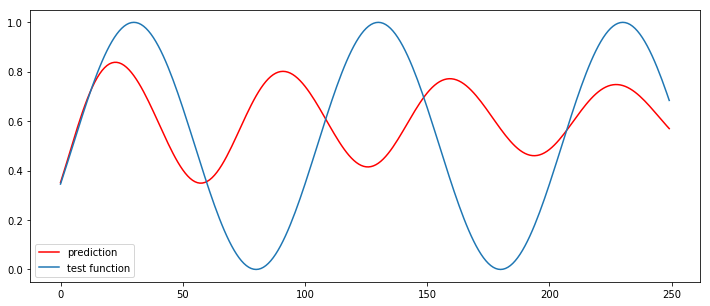

In [40]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

## Stateful LSTMs with wider window

In [42]:
look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
%%time
# create and fit the LSTM network
batch_size = 1
model = Sequential()
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

/home/malla/anaconda2/envs/tensorflow35/lib/python3.5/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


CPU times: user 1h 9min 35s, sys: 18min 23s, total: 1h 27min 59s
Wall time: 21min 13s


In [45]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.000333469831636
Test Score:  0.000337641414919
